#Problem Statement: Laptop Price Prediction for SmartTech Co.

SmartTech Co., a leading technology company, aims to strengthen its market competitiveness by understanding and accurately estimating laptop prices based on key hardware and brand features. With the rapid evolution of laptop technologies and an expanding product range across different brands, manual pricing strategies are becoming inefficient and prone to inaccuracies.

To address this challenge, SmartTech Co. seeks to develop a machine learning model that can predict laptop prices based on specifications such as brand, processor type, RAM, storage, screen size, GPU, operating system, and weight.

The goal is not only to achieve accurate price predictions but also to gain insights into how various factors influence pricing, enabling data-driven decisions for:

Competitive pricing strategy

Product positioning

Brand impact analysis

The project must ensure that the model is interpretable, scalable, and capable of real-time predictions for newly launched laptops, allowing SmartTech Co. to dynamically adapt to market trends.

#importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading the data set and performing data exploration

In [2]:
df=pd.read_csv('laptop.csv')
df.head()

,,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
#checking shape of dataset
df.shape

(1303, 13)

In [4]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0                     1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
#unique values per column
df.nunique()

,0
,1303
Unnamed: 0,1273
Company,19
TypeName,6
Inches,25
ScreenResolution,40
Cpu,118
Ram,10
Memory,40
Gpu,110


In [6]:
#getting statistical information on continuous variables
df.describe()

,,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


#Data preprocessing
##1.Feature Engineering <br>
###(i).Data Cleaning

In [7]:
#firstly i want to know how many columns are there in dataset
df.columns

Index(['      ', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [8]:
#as we see that ['         ', 'Unnamed: 0'] columns are not required so we need to drop them
df.drop(columns=['      ','Unnamed: 0'],inplace=True,axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
#checking null values
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


In [10]:
#removing null values
df.dropna(inplace=True)
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [11]:
#checking duplicates
df.duplicated().sum()

np.int64(29)

In [12]:
#getting the duplicated values
df[df.duplicated()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [13]:
#dropping duplicates
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

np.int64(0)

In [14]:
#resetting index after dropping records
df.reset_index(drop=True,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 107.0+ KB


#company column

In [16]:
#checking unique values in company column
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [17]:
df['Company'].value_counts()

,count
Company,
Lenovo,282
Dell,281
HP,260
Asus,149
Acer,101
MSI,53
Toshiba,47
Apple,21
Samsung,9


#Typename column

In [18]:
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [19]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,689
Gaming,203
Ultrabook,189
2 in 1 Convertible,112
Workstation,29
Netbook,22


#Inches column

In [20]:
df["Inches"].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [21]:
# as we have seen that there is wrong data "?" and wrong data type as object but it is float so we need to change it
df['Inches'].value_counts()

,count
Inches,
15.6,621
14,188
17.3,162
13.3,157
12.5,38
11.6,29
12,6
13.9,6
13.5,5


In [22]:
#lets see for which company is it is
df[df['Inches']=='?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
465,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24


In [23]:
#replacing "?" with 15.6 inches beacuse for that model the screen size is 15.6
df['Inches']=df['Inches'].replace('?',15.6)
df['Inches']=df['Inches'].astype('float')
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 17.3, 13.5, 12.5, 13. , 18.4, 13.9,
       11.6, 25.6, 35.6, 12.3, 27.3, 24. , 33.5, 31.6, 17. , 15. , 14.1,
       11.3, 10.1])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(2), object(9)
memory usage: 107.0+ KB


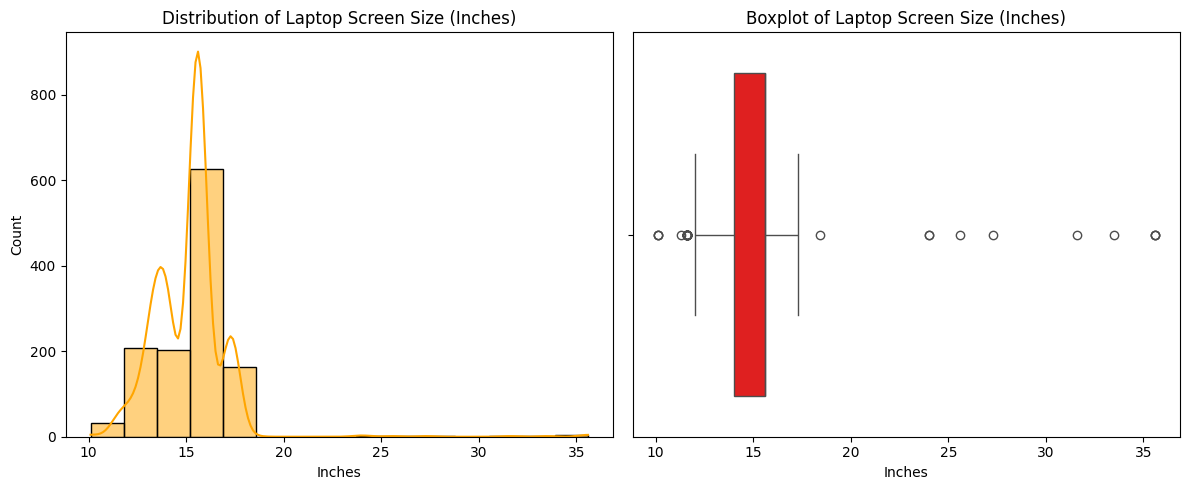

In [25]:
#Now lets check for outliers in this inches column
# Set figure size
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Inches'], kde=True, bins=15, color='orange')
plt.title('Distribution of Laptop Screen Size (Inches)')
plt.xlabel('Inches')
plt.ylabel('Count')

#  Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Inches'], color='red')
plt.title('Boxplot of Laptop Screen Size (Inches)')
plt.xlabel('Inches')

plt.tight_layout()
plt.show()

##there are outliers in our inches column so we need to tackle outliers because due to outliers our statistical analysis will go wrong and we get inaccurate predictions

In [26]:
df.describe()

,Inches,Price
count,1244.000000,1244.000000
mean,15.139228,60606.224427
std,1.966634,37424.636161
min,10.100000,9270.720000
25%,14.000000,32655.445200
50%,15.600000,52693.920000
75%,15.600000,79813.440000
max,35.600000,324954.720000


In [27]:
#replace outliers using IQR method(Winsorization)
Q1= np.percentile(df['Inches'],25)
Q3= np.percentile(df['Inches'],75)

IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df['Inches'].clip(lower_limit,upper_limit,inplace=True)

/tmp/ipython-input-926705411.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Inches'].clip(lower_limit,upper_limit,inplace=True)


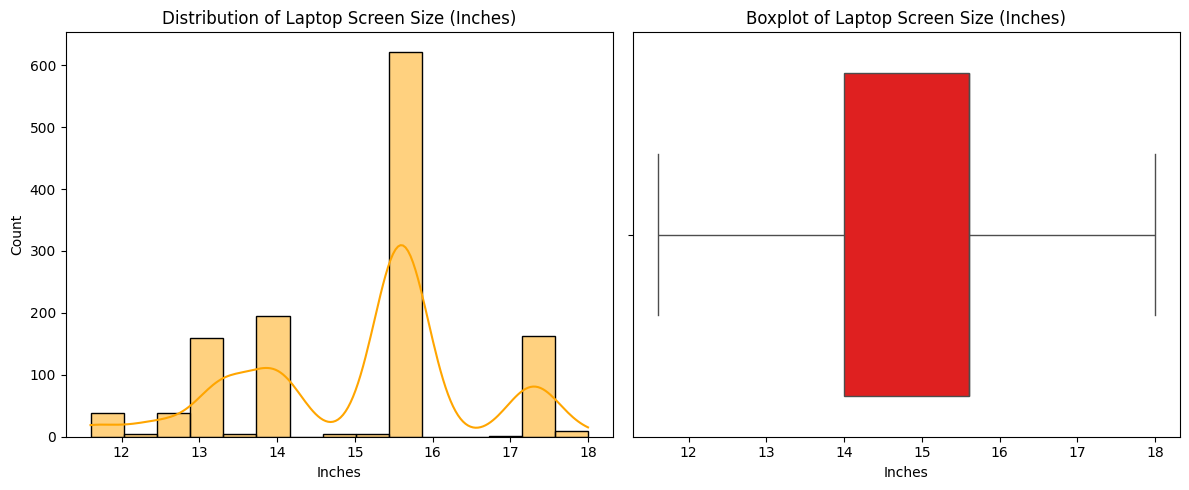

In [28]:
#Now lets recheck for outliers in this inches column
# Set figure size
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Inches'], kde=True, bins=15, color='orange')
plt.title('Distribution of Laptop Screen Size (Inches)')
plt.xlabel('Inches')
plt.ylabel('Count')

#  Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Inches'], color='red')
plt.title('Boxplot of Laptop Screen Size (Inches)')
plt.xlabel('Inches')

plt.tight_layout()
plt.show()

In [29]:
df['Inches'].skew()

np.float64(-0.32338313237339067)

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#ScreenResolution column

In [31]:
df1=df.copy()
df1[ 'ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

##We see that there are 40 unique values in this column we need to perform dimensionality reduction inorder reduce complexity,overfitting
 steps<br>
##1.We are trying to extract the numeric screen resolution values (width × height) from strings that look like "1920x1080" or "2560x1600".After extracting, the values are still strings (text) — like '1920' and '1080'.so i did converted them to numeric because the machine doesnt understand the text data
###=============================================================================
##2.we need to create a touchscreen and IPS columns because Touchscreens usually make laptops more expensive, so this feature will likely have a positive correlation with price.if touchscreen is there replace it with one else 0 and simillarly for IPS(in-plane switching)IPS display	   💸 Increases price due to better panel quality
###=============================================================================
##3.created a Display column


In [32]:
df1['ScreenResolution'].str.strip()

,ScreenResolution
0,IPS Panel Retina Display 2560x1600
1,1440x900
2,Full HD 1920x1080
3,IPS Panel Retina Display 2880x1800
4,IPS Panel Retina Display 2560x1600
...,...
1239,1366x768
1240,IPS Panel Full HD / Touchscreen 1920x1080
1241,IPS Panel Quad HD+ / Touchscreen 3200x1800
1242,1366x768


In [33]:
# Split by 'x' to get width and height
df1['X_res'] = df1['ScreenResolution'].apply(lambda x: x.split('x')[0][-4:])  # here we get last 4 digits before x
df1['Y_res'] = df1['ScreenResolution'].apply(lambda x: x.split('x')[1][:4])  # here we get first 4 digits after x

# Convert to integers safely
df1['X_res'] = df1['X_res'].astype(int)
df1['Y_res'] = df1['Y_res'].astype(int)
df1.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600


In [34]:
df1['Touchscreen'] = df1['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df1['IPS'] = df1['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df1


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,1366,768,0,0
1240,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1920,1080,1,1
1241,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,3200,1800,1,1
1242,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366,768,0,0


In [35]:
#creating new column 'Dispaly' using above function
df1['ppi'] = (((df1['X_res']**2) + (df1['Y_res']**2))**0.5/df1['Inches']).astype('float')

In [36]:
#dropping  columns
df1.drop(columns=['ScreenResolution'],inplace=True)


In [38]:
df1.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1244 non-null   object 
 1   TypeName     1244 non-null   object 
 2   Cpu          1244 non-null   object 
 3   Ram          1244 non-null   object 
 4   Memory       1244 non-null   object 
 5   Gpu          1244 non-null   object 
 6   OpSys        1244 non-null   object 
 7   Weight       1244 non-null   object 
 8   Price        1244 non-null   float64
 9   Touchscreen  1244 non-null   int64  
 10  IPS          1244 non-null   int64  
 11  ppi          1244 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 116.8+ KB


#CPU column
## Created CPU brand column by extracting all kind of cpu brand like intel ,AMD etc...

In [40]:
#created a copy of df1 and stored in df2
df2=df1.copy()
print("Unique values in CPU column : \n",df2['Cpu'].unique())
print("Number of unique values :",len(df2['Cpu'].unique()))

Unique values in CPU column : 
 ['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Core i5 7300HQ 2.5GHz' 'AMD E-Series E2-9000e 1.5GHz'
 'Intel Core i5 1.6GHz' 'Intel Core i7 8650U 1.9GHz'
 'Intel Atom x5-Z8300 1.44GHz' 'AMD E-Series E2-6110 1.5GHz'
 'AMD A6-Series 9220 2.5GHz' 'Intel Celeron Dual Core N3350 1.1GHz'
 'Intel Core i3 7130U 2.7GHz' 'Intel Core i7 7700HQ 2.8GHz'
 'Intel Core i5 2.0GHz' 'AMD Ryzen 1700 3GHz'
 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Celeron Dual Core N3060 1.6GHz' 'Intel Core i5 1.3GHz'
 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-Series 6110 1.5GHz' 'Intel Core i5 6200U 2.3GHz'
 'Intel Core M 6Y

In [41]:
#creating a function to extract cpu brand from cpu column
def extract_cpu_brand(cpu_name):
    cpu_name = cpu_name.lower()
    cpu_map = {
        'i3': 'Intel Core i3',
        'i5': 'Intel Core i5',
        'i7': 'Intel Core i7',
        'pentium': 'Intel Pentium',
        'celeron': 'Intel Celeron',
        'atom': 'Intel Atom',
        'e-series': 'AMD E-Series',
        'fx': 'AMD FX',
        'ryzen': 'AMD Ryzen',
        'a4': 'AMD A4-Series',
        'a6': 'AMD A6-Series',
        'a8': 'AMD A8-Series',
        'a9': 'AMD A9-Series',
        'a10': 'AMD A10-Series',
        'a12': 'AMD A12-Series',
        'cortex': 'Samsung Cortex'
    }

    for key, value in cpu_map.items():
        if key in cpu_name:
            return value
    return 'Other Intel Processor'


In [42]:
#applying function to cpu column and creating cpu brand column
df2['CPU_Brand'] = df['Cpu'].apply(extract_cpu_brand)
df2.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU_Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='CPU_Brand'>

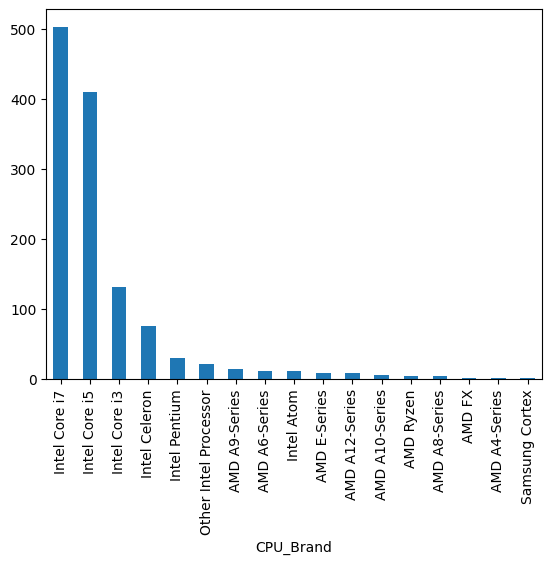

In [43]:
df2['CPU_Brand'].value_counts().plot(kind='bar')

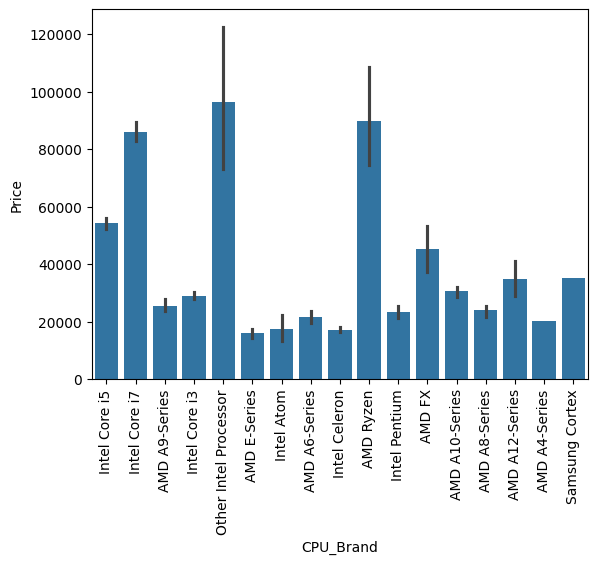

In [44]:
sns.barplot(x=df2['CPU_Brand'],y=df2['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
#dropping original cpu column
df2.drop(columns=['Cpu'],inplace=True)
df2.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU_Brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


#Ram Column

In [46]:
#checking unique values
df2['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [47]:
#seperating GB from ram
df2['Ram']=df2['Ram'].str.replace('GB','')

In [48]:
#converting ram to integer type
df2['Ram']= df2['Ram'].astype('int')
df2.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU_Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


#Memory column

In [49]:
#creating a copy of df2 and storing in df3 variable
df3=df2.copy()

In [50]:
# In memory column there are many unique values we need perform dimensionality reduction
df3["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [51]:
df3['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,209
500GB HDD,121
512GB SSD,112
128GB SSD + 1TB HDD,92
128GB SSD,72
256GB SSD + 1TB HDD,71
32GB Flash Storage,35
2TB HDD,16


In [52]:
#checking error value
df3[df3['Memory']=='?']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU_Brand
749,Dell,Notebook,16,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656,0,0,141.211998,Intel Core i7


In [53]:
#replacing error value with  mode
df3['Memory']=df3['Memory'].str.replace('?.','516GB SSD')

In [54]:
#creating fun to extract and categorize SSD
def category(x):
  if '8GB SSD' in x:
    return 8
  elif '16GB SSD' in x:
    return 16
  elif '32GB SSD' in x:
    return 32
  elif '64GB SSD' in x:
    return 64
  elif '128GB SSD' in x:
    return 128
  elif '180GB SSD' in x:
    return 180
  elif '240GB SSD' in x:
    return 240
  elif '256GB SSD' in x:
    return 256
  elif '512GB SSD' in x:
    return 512
  elif '1TB SSD' in x:
    return 1000
  else:
    return 0

In [55]:
#creating new column SSD using above function
df3['SSD']=df3['Memory'].apply(category)


In [56]:
df3['SSD'].unique()

array([   8,    0,  256,  512,   32,   64, 1000,   16,  180,  240])

In [57]:
#creating function to extract and categorize HDD
def category(x):
  if '32GB HDD'in x:
    return 32
  elif '128GB HDD' in x:
    return 128
  elif '500GB HDD' in x:
    return 500
  elif '1TB HDD' in x:
    return 1000
  elif '1.0TB HDD' in x:
    return 1000
  elif '2TB HDD' in x:
    return 2000
  else:
    return 0

In [58]:
#creating new column HDD using above function
df3['HDD']=df3['Memory'].apply(category)

In [59]:
df3['HDD'].unique()

array([   0,  500, 1000, 2000,   32,  128])

In [60]:
#similarly creating function to extract flash storage
def category(x):
  if '16GB Flash' in x:
    return 16
  elif '32GB Flash' in x:
    return 32
  elif '64GB Flash' in x:
    return 64
  elif '128GB Flash' in x:
    return 128
  elif '256GB Flash' in x:
    return 256
  elif '512GB Flash' in x:
    return 512
  else:
    return 0

In [61]:
#creating new column flash stoarage using above function
df3['Flash_Storage']=df3['Memory'].apply(category)

In [62]:
df3['Flash_Storage'].unique()

array([  0, 128, 256,  64,  32,  16, 512])

In [63]:
#creating new column hybrid storage
df3['Hybrid_Storage']=df3['Memory'].apply(lambda x: 508 if '508GB Hybrid' in x else 1000 if '1.0TB Hybrid' in x else 0)

In [64]:
df3['Hybrid_Storage'].unique()

array([   0, 1000,  508])

In [65]:
#dropping memory as values are extracted
df3.drop(columns=['Memory'],inplace=True)

In [66]:
df3.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,8,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,0


In [67]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1244 non-null   object 
 1   TypeName        1244 non-null   object 
 2   Ram             1244 non-null   int64  
 3   Gpu             1244 non-null   object 
 4   OpSys           1244 non-null   object 
 5   Weight          1244 non-null   object 
 6   Price           1244 non-null   float64
 7   Touchscreen     1244 non-null   int64  
 8   IPS             1244 non-null   int64  
 9   ppi             1244 non-null   float64
 10  CPU_Brand       1244 non-null   object 
 11  SSD             1244 non-null   int64  
 12  HDD             1244 non-null   int64  
 13  Flash_Storage   1244 non-null   int64  
 14  Hybrid_Storage  1244 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 145.9+ KB


#GPU column

In [68]:
#There are lot of unique values in this GPU column we need to extract it
df3['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [69]:
#creating new column GPU Brand
df3['Gpu_Brand']=df3['Gpu'].apply(lambda x: x.split()[0])

In [70]:
df3['Gpu_Brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [71]:
#drppimg GPU column as their is o more need
df3.drop(columns=['Gpu'],inplace=True)

In [72]:
df3.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,8,0,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,8,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,0,Intel


#OPSys column

In [73]:
df3['OpSys'].unique()


array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [74]:
#categorizing OpSys
df3['OpSys']=df3['OpSys'].apply(lambda x: 'Windows 11' if 'Windows 10 S' in x else 'macOS' if 'Mac OS X' in x else x)

In [75]:
df3['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Linux', 'Windows 11', 'Chrome OS',
       'Windows 7', 'Android'], dtype=object)

#Weight column

In [76]:
df3['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [77]:
#checking error value
df3[df3['Weight']=='?']

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand
201,Dell,Ultrabook,8,Windows 10,?,77202.72,0,0,165.632118,Intel Core i7,256,0,0,0,Intel


In [78]:
#replacing error value and removing kg from weight column
df3['Weight']=df3['Weight'].str.replace('?','2.2kg')
df3['Weight']=df3['Weight'].str.replace('kg','')

In [79]:
#changing dataype of weight
df3['Weight']=df3['Weight'].astype('float')

In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1244 non-null   object 
 1   TypeName        1244 non-null   object 
 2   Ram             1244 non-null   int64  
 3   OpSys           1244 non-null   object 
 4   Weight          1244 non-null   float64
 5   Price           1244 non-null   float64
 6   Touchscreen     1244 non-null   int64  
 7   IPS             1244 non-null   int64  
 8   ppi             1244 non-null   float64
 9   CPU_Brand       1244 non-null   object 
 10  SSD             1244 non-null   int64  
 11  HDD             1244 non-null   int64  
 12  Flash_Storage   1244 non-null   int64  
 13  Hybrid_Storage  1244 non-null   int64  
 14  Gpu_Brand       1244 non-null   object 
dtypes: float64(3), int64(7), object(5)
memory usage: 145.9+ KB


<Axes: ylabel='Weight'>

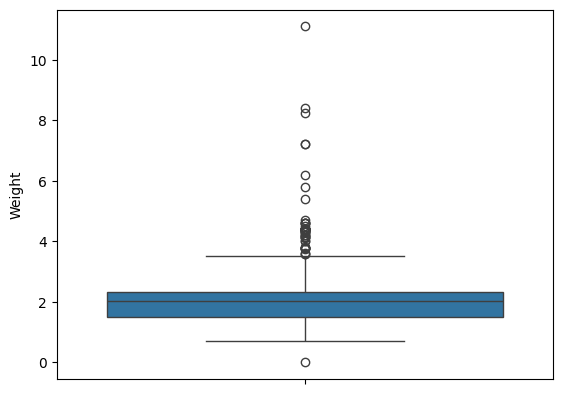

In [81]:
#checking Outliers in weight
sns.boxplot(df3['Weight'])


In [82]:
#replacing outliers using IQR method
Q1=df3['Weight'].quantile(0.25)
Q3=df3['Weight'].quantile(0.75)

IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

df3['Weight'].clip(lower_limit,upper_limit,inplace=True)

/tmp/ipython-input-189379509.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Weight'].clip(lower_limit,upper_limit,inplace=True)


#Checking outliers after trimming outliers in weight column

<Axes: ylabel='Weight'>

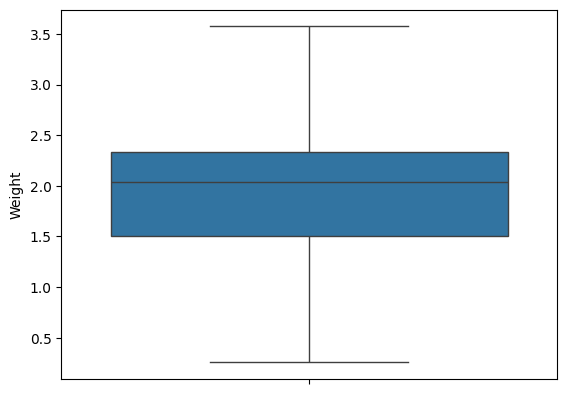

In [83]:
sns.boxplot(df3['Weight'])

#Price column

In [84]:
df4=df3.copy()

/tmp/ipython-input-3362340808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Price'])


<Axes: xlabel='Price', ylabel='Density'>

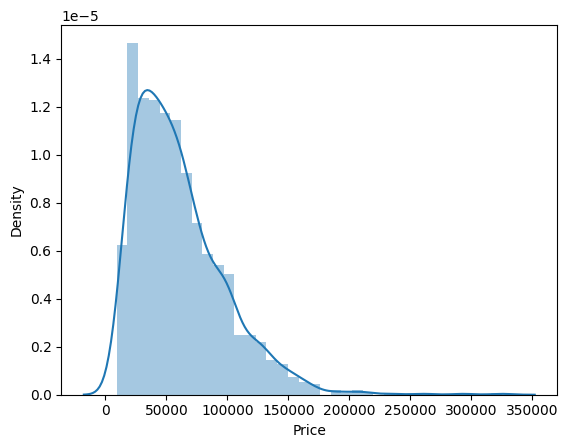

In [85]:
sns.distplot(df4['Price'])

In [86]:
#performing log transformation
df4['Price']=np.log(df4["Price"])

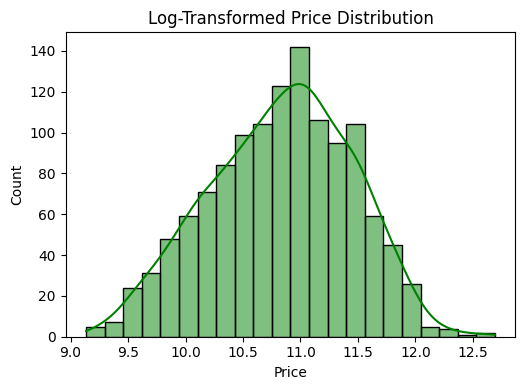

In [87]:
#checking distribution after performing lagorthimic transformation
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
sns.histplot(df4['Price'], kde=True, color='green')
plt.title('Log-Transformed Price Distribution')
plt.tight_layout()
plt.show()

In [88]:
df4.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Touchscreen',
       'IPS', 'ppi', 'CPU_Brand', 'SSD', 'HDD', 'Flash_Storage',
       'Hybrid_Storage', 'Gpu_Brand'],
      dtype='object')

In [89]:
df4 = df4[['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Touchscreen',
       'IPS', 'ppi', 'CPU_Brand', 'SSD', 'HDD', 'Flash_Storage',
       'Hybrid_Storage', 'Gpu_Brand', 'Price']]

In [90]:
df4.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,ppi,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand,Price
0,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,8,0,0,0,Intel,11.175755
1,Apple,Ultrabook,8,macOS,1.34,0,0,127.677940,Intel Core i5,0,0,128,0,Intel,10.776777
2,HP,Notebook,8,No OS,1.86,0,0,141.211998,Intel Core i5,256,0,0,0,Intel,10.329931
3,Apple,Ultrabook,16,macOS,1.83,0,1,220.534624,Intel Core i7,512,0,0,0,AMD,11.814476
4,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,256,0,0,0,Intel,11.473101


#Data visualizations
##Univariate,Bivariate and Multivariate Visualizations

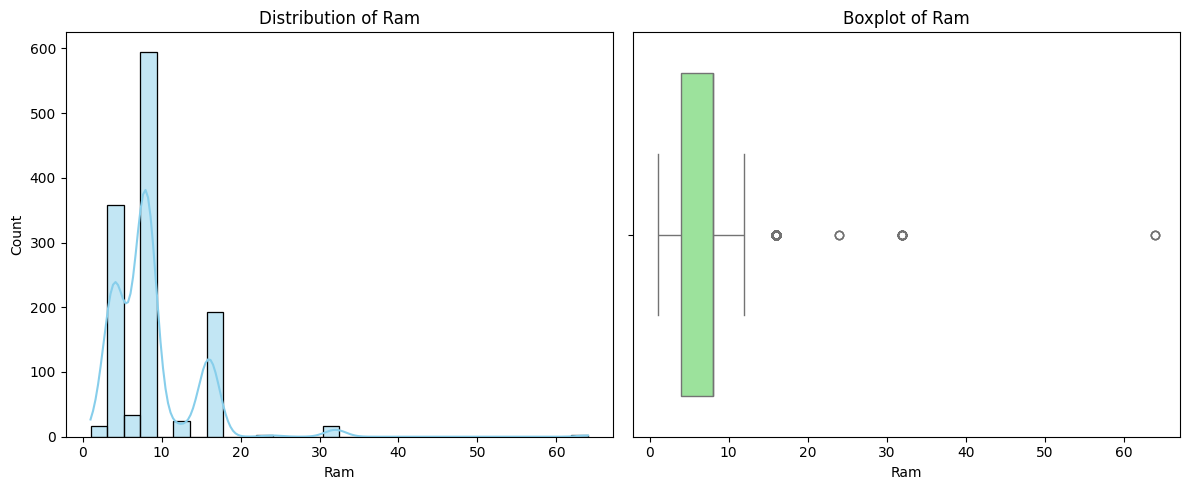

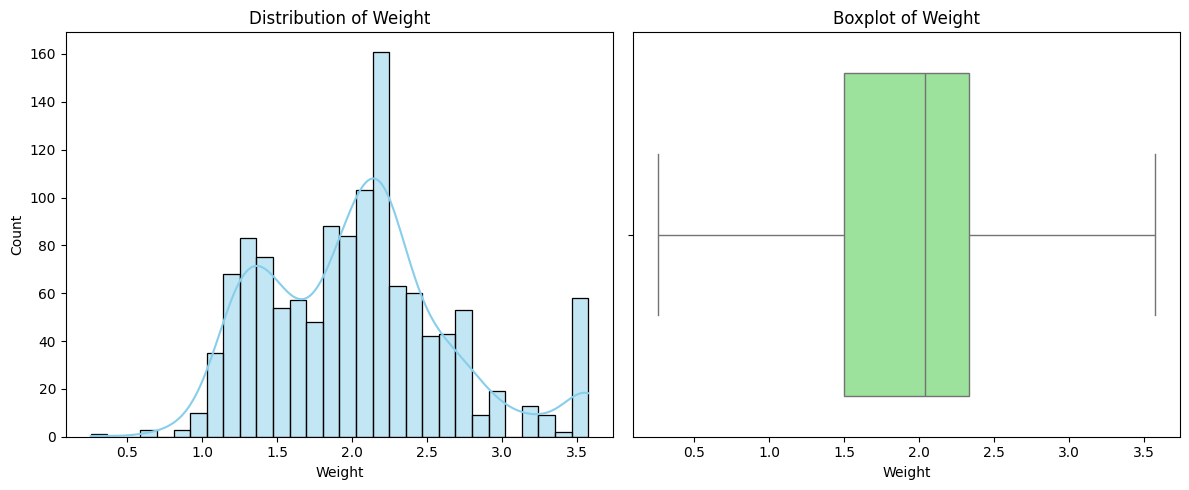

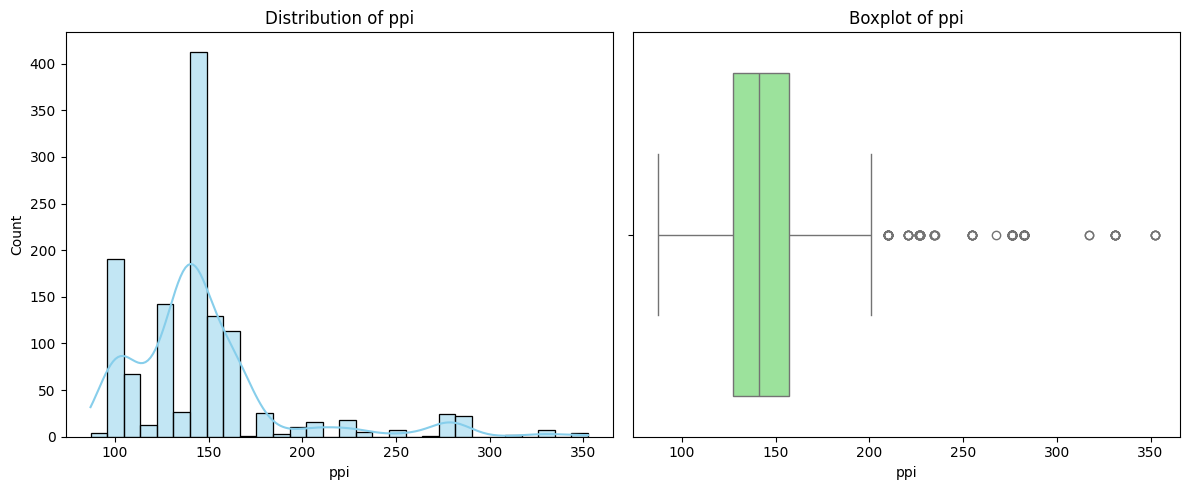

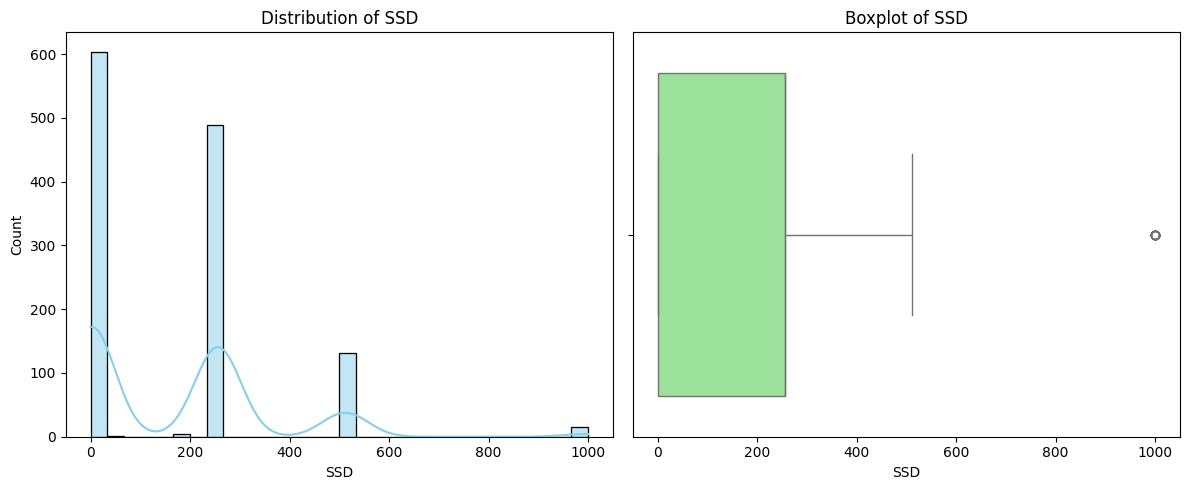

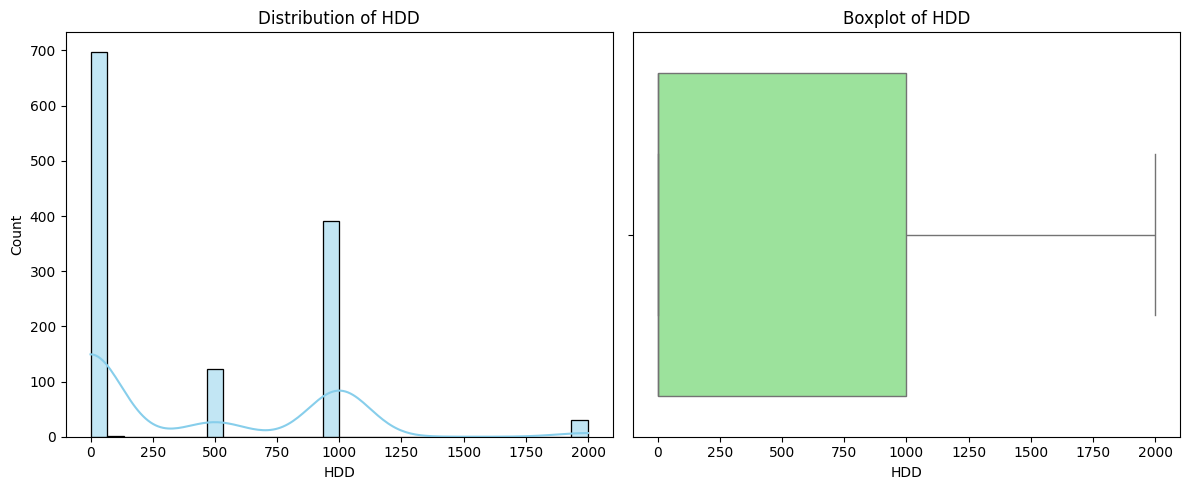

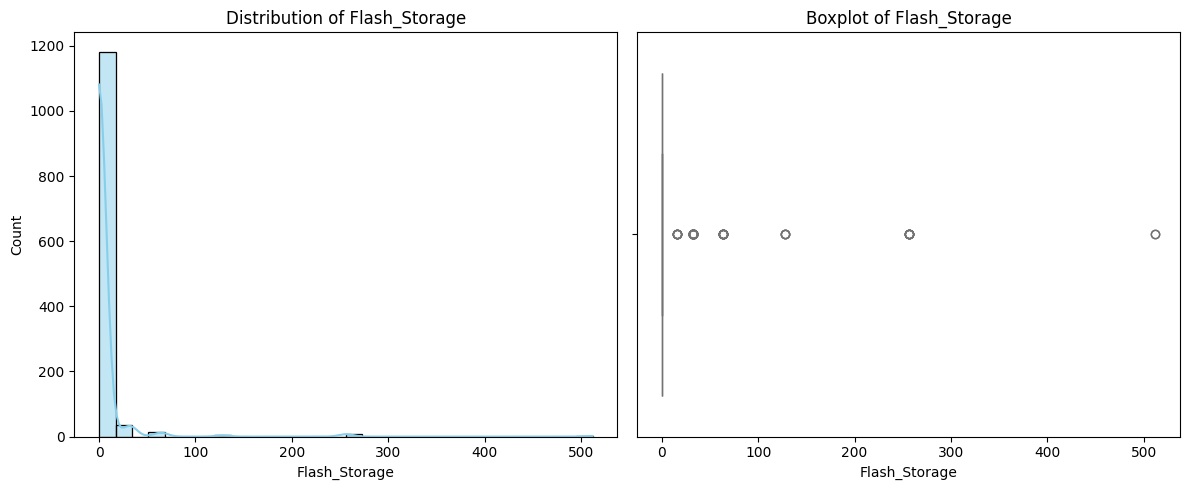

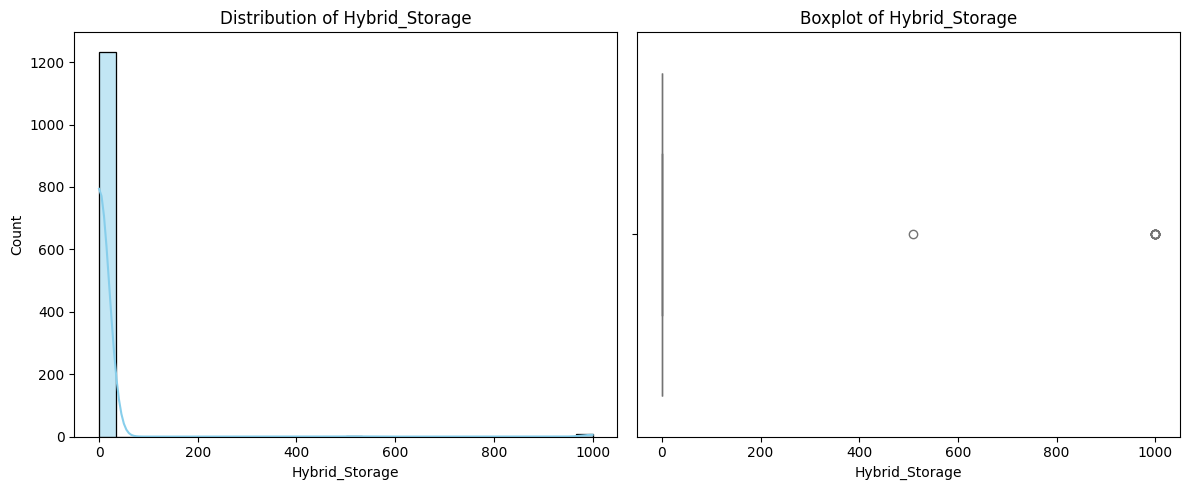

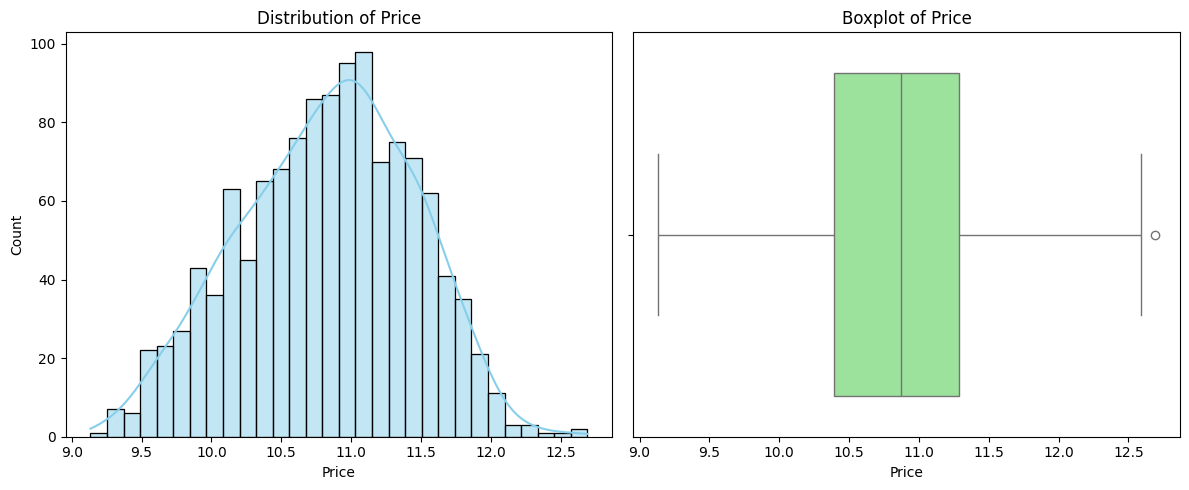

In [91]:
num_cols = ['Ram', 'Weight', 'ppi', 'SSD', 'HDD',
            'Flash_Storage', 'Hybrid_Storage', 'Price']

for col in num_cols:
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(df4[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df4[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

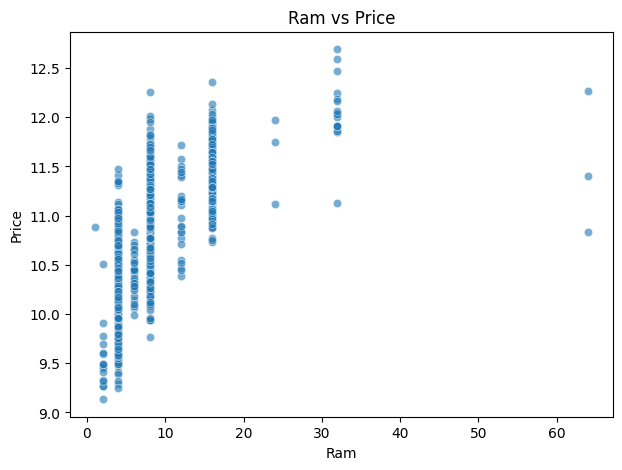

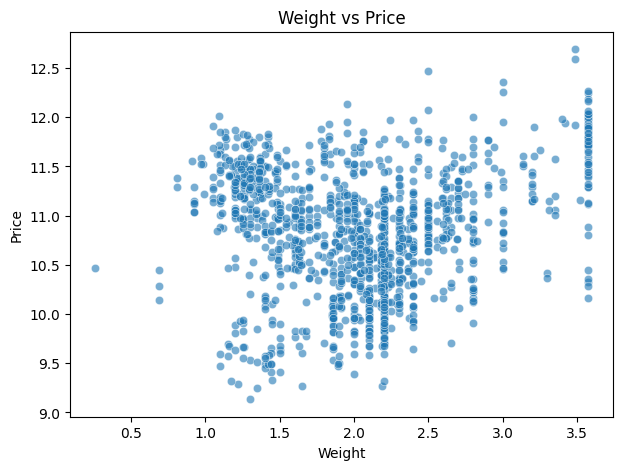

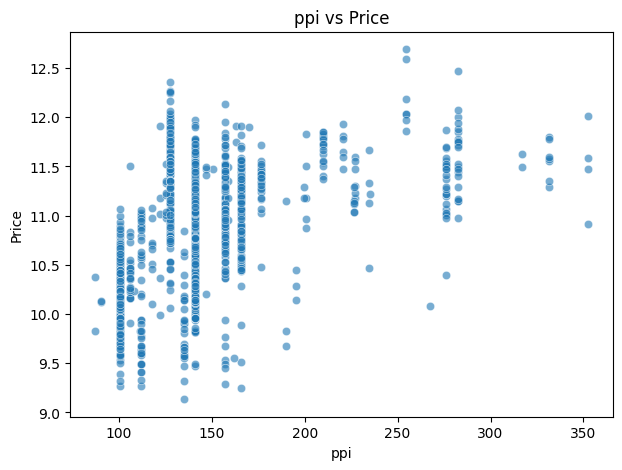

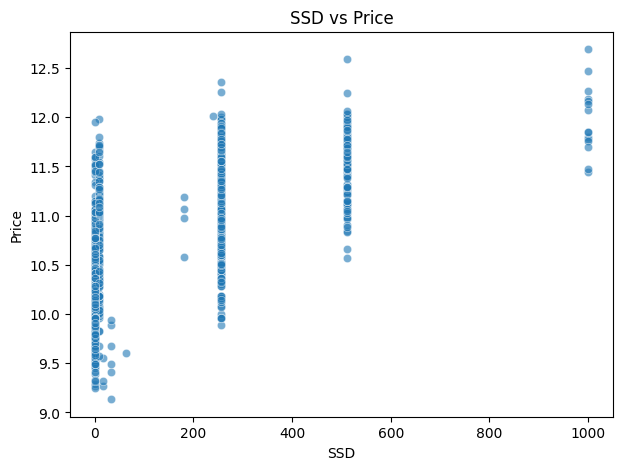

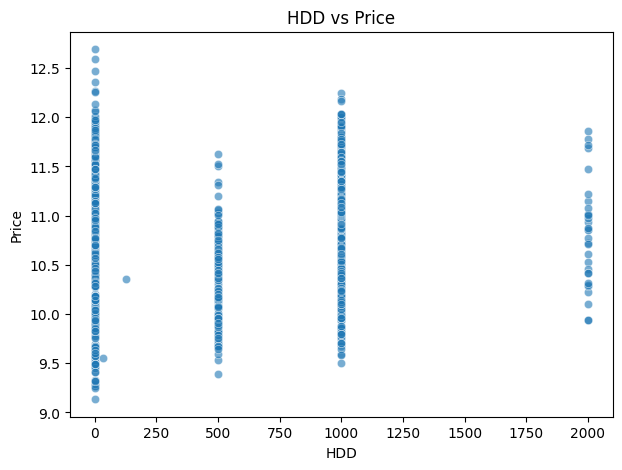

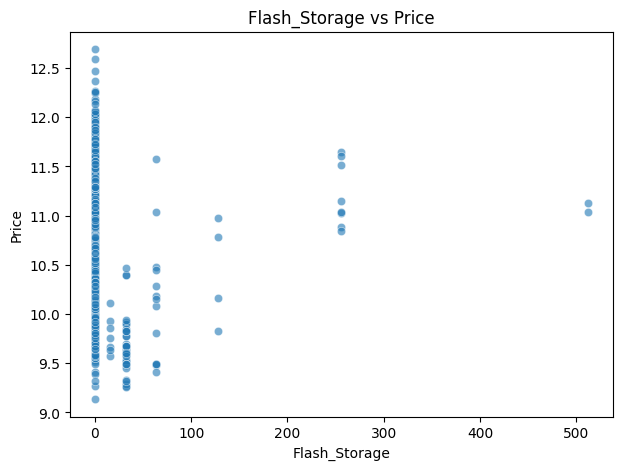

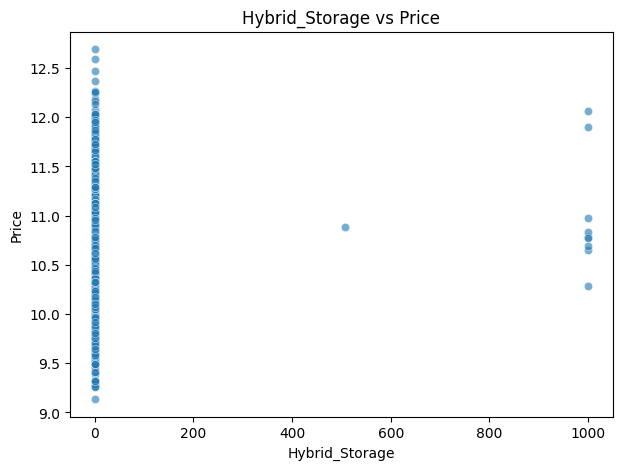

In [92]:
for col in num_cols:
    if col != 'Price':
        plt.figure(figsize=(7,5))
        sns.scatterplot(x=df4[col], y=df4['Price'], alpha=0.6)
        plt.title(f"{col} vs Price")
        plt.show()

/tmp/ipython-input-2937313105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df4[col], y=df4['Price'], estimator='mean', errorbar=None,palette='coolwarm')


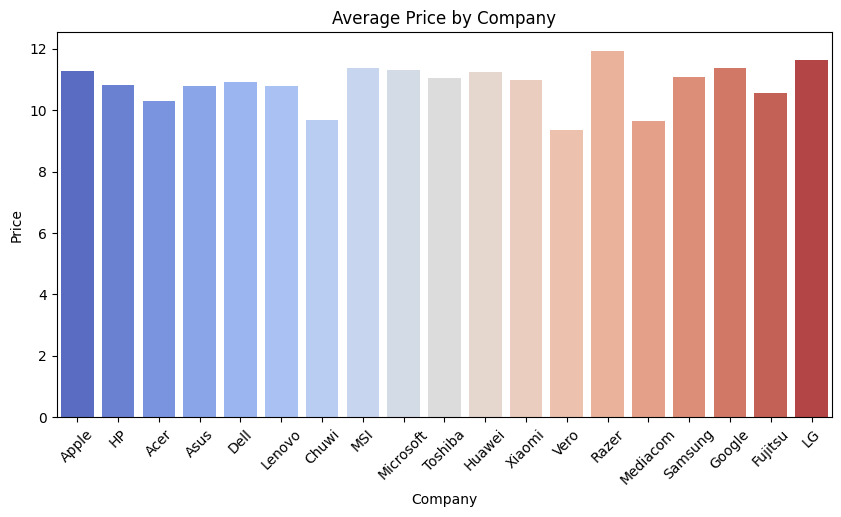

/tmp/ipython-input-2937313105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df4[col], y=df4['Price'], estimator='mean', errorbar=None,palette='coolwarm')


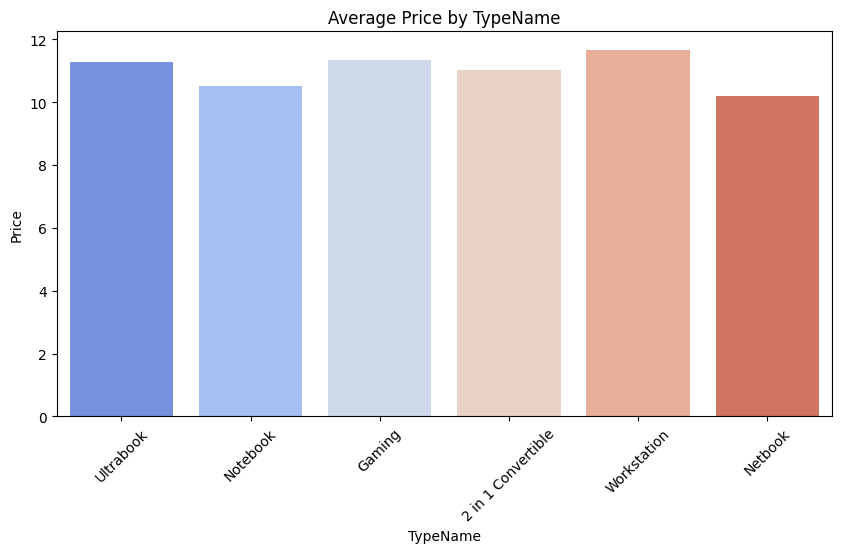

/tmp/ipython-input-2937313105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df4[col], y=df4['Price'], estimator='mean', errorbar=None,palette='coolwarm')


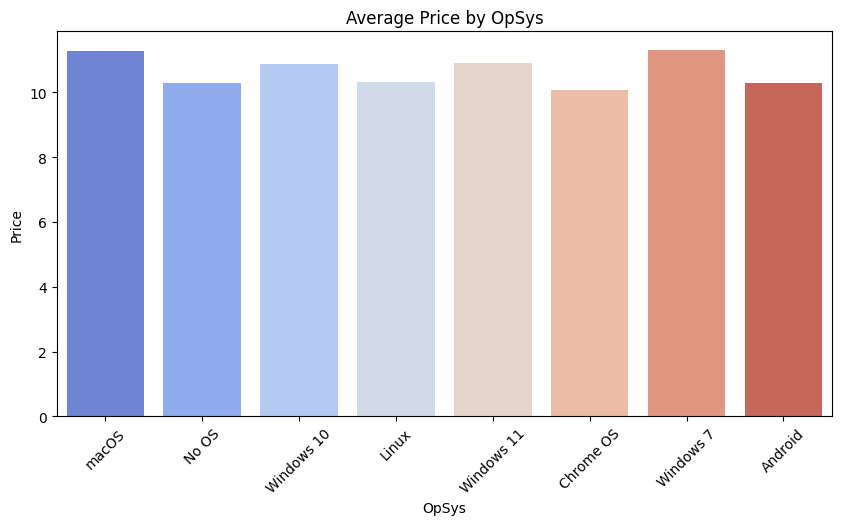

/tmp/ipython-input-2937313105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df4[col], y=df4['Price'], estimator='mean', errorbar=None,palette='coolwarm')


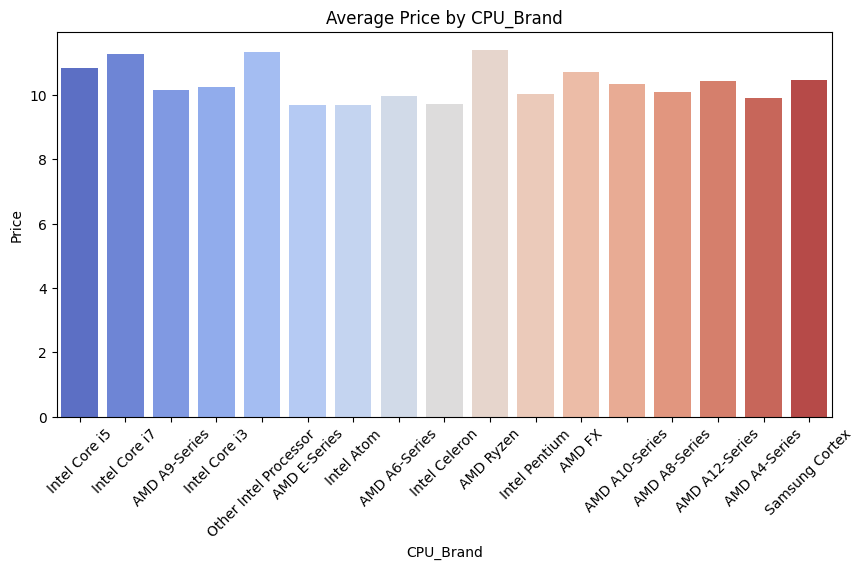

/tmp/ipython-input-2937313105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df4[col], y=df4['Price'], estimator='mean', errorbar=None,palette='coolwarm')


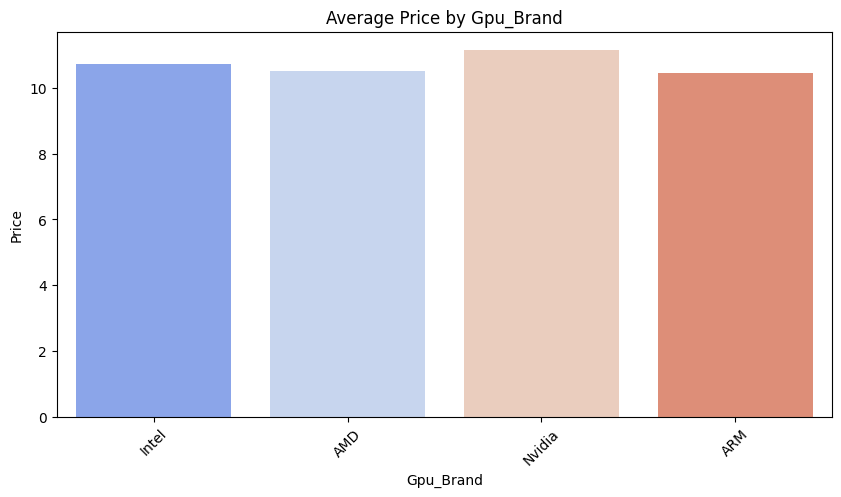

In [98]:
cat_cols = ['Company', 'TypeName', 'OpSys', 'CPU_Brand', 'Gpu_Brand']

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.barplot(x=df4[col], y=df4['Price'], estimator='mean', errorbar=None,palette='coolwarm')
    plt.title(f"Average Price by {col}")
    plt.xticks(rotation=45)
    plt.show()

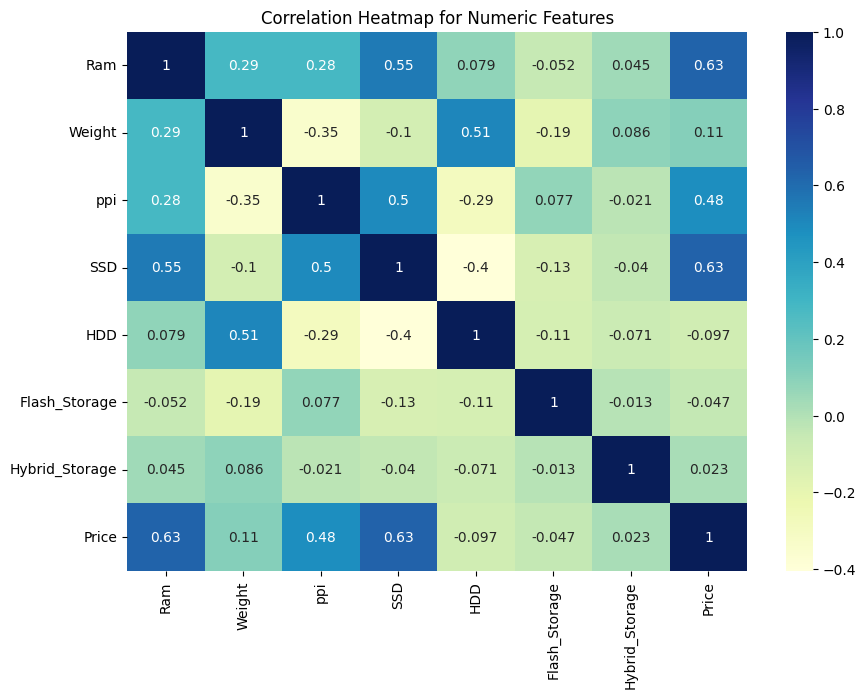

In [94]:
plt.figure(figsize=(10,7))
sns.heatmap(df4[num_cols].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

In [99]:
df5=df4.copy()

In [100]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1244 non-null   object 
 1   TypeName        1244 non-null   object 
 2   Ram             1244 non-null   int64  
 3   OpSys           1244 non-null   object 
 4   Weight          1244 non-null   float64
 5   Touchscreen     1244 non-null   int64  
 6   IPS             1244 non-null   int64  
 7   ppi             1244 non-null   float64
 8   CPU_Brand       1244 non-null   object 
 9   SSD             1244 non-null   int64  
 10  HDD             1244 non-null   int64  
 11  Flash_Storage   1244 non-null   int64  
 12  Hybrid_Storage  1244 non-null   int64  
 13  Gpu_Brand       1244 non-null   object 
 14  Price           1244 non-null   float64
dtypes: float64(3), int64(7), object(5)
memory usage: 145.9+ KB


#2.Feature selection

In [101]:
#we are going to use only postively correleted column
df5.corr(numeric_only=True)['Price'].head(15)

,Price
Ram,0.630098
Weight,0.107065
Touchscreen,0.191605
IPS,0.281700
ppi,0.484096
SSD,0.633479
HDD,-0.097039
Flash_Storage,-0.047362
Hybrid_Storage,0.022595
Price,1.000000


In [103]:
df6=df5.copy()
df6.drop(columns=['Flash_Storage','Hybrid_Storage'],inplace=True)
df6.head()


,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,ppi,CPU_Brand,SSD,HDD,Gpu_Brand,Price
0,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,8,0,Intel,11.175755
1,Apple,Ultrabook,8,macOS,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,10.776777
2,HP,Notebook,8,No OS,1.86,0,0,141.211998,Intel Core i5,256,0,Intel,10.329931
3,Apple,Ultrabook,16,macOS,1.83,0,1,220.534624,Intel Core i7,512,0,AMD,11.814476
4,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,256,0,Intel,11.473101


#Modelling and Evaluation

In [104]:
#segregating the data into input and output
X=df6.drop(columns=['Price'])#X=independent variable
y=df6['Price']#Y=dependent variable

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [119]:
#Splitting the data into tarin and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((995, 12), (249, 12), (995,), (249,))

In [110]:
df6.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Touchscreen', 'IPS',
       'ppi', 'CPU_Brand', 'SSD', 'HDD', 'Gpu_Brand', 'Price'],
      dtype='object')

#Linear regression model

In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8644002309316268
MAE 0.1901585754053928


#KNN(K-nearest-neighbors) algorithm

In [113]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.7720526950091848
MAE 0.23436874502729407


#SVM Regressor

In [114]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8243137001883043
MAE 0.20455306252016592


#Decision Tree Regressor

In [115]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.800830954619601
MAE 0.21286274634302454


#Random Fortest Regressor

In [116]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.873702801706459
MAE 0.1742423240943968


#GradientBoost Regressor

In [117]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.904674043853967
MAE 0.15489968239486898


#XGB Regressor

In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.878969676716515
MAE 0.16712850597073417


#Hyperparameter Tuning for the best model

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor # Import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the preprocessing steps for different column types
# Identify categorical columns that need one-hot encoding
# Based on df6.columns: ['Company', 'TypeName', 'OpSys', 'CPU_Brand', 'Gpu_Brand']
categorical_features = ['Company', 'TypeName', 'OpSys', 'CPU_Brand', 'Gpu_Brand']

# Identify numerical columns that should be passed through
# Based on df6.columns: ['Ram', 'Weight', 'Touchscreen', 'IPS', 'ppi', 'SSD', 'HDD']
numerical_features = ['Ram', 'Weight', 'Touchscreen', 'IPS', 'ppi', 'SSD', 'HDD']


# Create the ColumnTransformer
# It applies OneHotEncoder to categorical features and passes through numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough' # Pass through the numerical columns
)

# Create the Pipeline: Preprocessing followed by the Estimator
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', RandomForestRegressor(random_state=42)) # The estimator to be tuned
])


# Define the parameter grid for the estimator (RandomForestRegressor)
# The parameters in the grid should be prefixed with the estimator's name in the pipeline ('estimator__')
param_grid = {
    'estimator__n_estimators': [100, 200, 300, 500],             # number of trees
    'estimator__max_depth': [None, 5, 10, 15, 20],               # depth of trees
    'estimator__min_samples_split': [2, 5, 10],                  # min samples to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4, 5],                 # min samples per leaf
    'estimator__max_features': ['sqrt', 'log2'] # 'auto' is deprecated, use 'sqrt' or 'log2'
}

In [138]:
# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipeline, # Use the pipeline as the estimator
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV object on the training data (X_train, y_train)
# The pipeline within GridSearchCV will handle the preprocessing
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator (the fitted pipeline with the best parameters)
best_pipeline = grid_search.best_estimator_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Parameters: {'estimator__max_depth': 20, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}


#Final Model

In [139]:
#Train final model with the best parameters
best_model = grid_search.best_estimator_

#Make predictions6
y_pred = best_model.predict(X_test)

#Evaluate
print('R2 Score of random forest Regressor :', round(r2_score(y_test, y_pred),4))
print('MAE of random forest Regressor :', mean_absolute_error(y_test, y_pred))
print('MSE of random forest Regressor :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score of random forest Regressor : 0.8816
MAE of random forest Regressor : 0.16674042567812503
MSE of random forest Regressor : 0.0491918802832297
RMSE : 0.22179242611782238


In [140]:
df6.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Touchscreen', 'IPS',
       'ppi', 'CPU_Brand', 'SSD', 'HDD', 'Gpu_Brand', 'Price'],
      dtype='object')

In [141]:
import pickle

pickle.dump(df6,open('df6.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [142]:
df6

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,ppi,CPU_Brand,SSD,HDD,Gpu_Brand,Price
0,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,8,0,Intel,11.175755
1,Apple,Ultrabook,8,macOS,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,10.776777
2,HP,Notebook,8,No OS,1.86,0,0,141.211998,Intel Core i5,256,0,Intel,10.329931
3,Apple,Ultrabook,16,macOS,1.83,0,1,220.534624,Intel Core i7,512,0,AMD,11.814476
4,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,256,0,Intel,11.473101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Asus,Notebook,4,Windows 10,2.20,0,0,100.454670,Intel Core i7,0,500,Nvidia,10.555257
1240,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,1,1,157.350512,Intel Core i7,8,0,Intel,10.433899
1241,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,1,1,276.053530,Intel Core i7,512,0,Intel,11.288115
1242,Lenovo,Notebook,2,Windows 10,1.50,0,0,111.935204,Intel Celeron,0,0,Intel,9.409283


In [143]:
X_train

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,ppi,CPU_Brand,SSD,HDD,Gpu_Brand
554,Dell,Notebook,4,Windows 10,1.93,0,0,100.454670,Intel Core i5,0,500,Intel
489,HP,Notebook,8,Windows 10,1.91,0,0,100.454670,Intel Core i5,256,0,AMD
828,HP,Notebook,4,No OS,1.86,0,0,100.454670,Intel Celeron,8,0,Intel
588,HP,Notebook,4,Windows 10,2.10,0,0,100.454670,Intel Core i3,0,500,Intel
794,Razer,Ultrabook,16,Windows 10,1.29,1,1,352.465147,Intel Core i7,512,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
763,MSI,Gaming,16,Windows 10,1.60,0,1,157.350512,Intel Core i7,256,1000,Nvidia
835,HP,2 in 1 Convertible,8,Windows 10,1.28,1,0,165.632118,Intel Core i7,256,0,Intel
1216,Dell,Notebook,4,Windows 10,1.60,0,0,111.935204,Intel Core i5,0,500,Intel
559,HP,Notebook,6,Windows 10,1.95,0,1,141.211998,AMD A9-Series,256,0,AMD
